Cleaned column names: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']

📊 Model Evaluation:
Mean Absolute Error (MAE): 179792.11
Root Mean Squared Error (RMSE): 990190.73


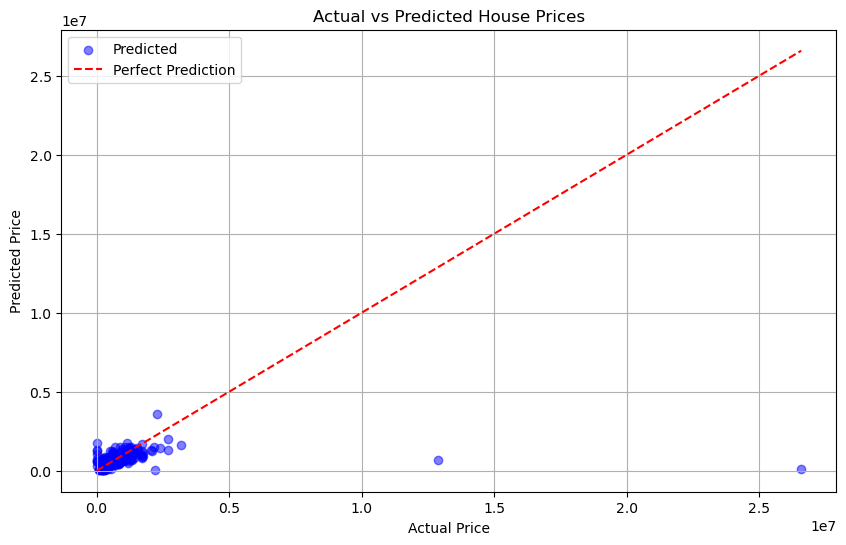

In [13]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Load the Dataset
df = pd.read_csv("D:\\data.csv")  # Make sure this path is correct

# Step 3: Clean Column Names (lowercase, remove extra spaces)
df.columns = df.columns.str.strip().str.lower()
print("Cleaned column names:", df.columns.tolist())

# Step 4: Drop Rows with Missing Values
df = df.dropna(subset=['sqft_living', 'bedrooms', 'city', 'price'])

# Step 5: Define Features (X) and Target (y)
X = df[['sqft_living', 'bedrooms', 'city']]  # Input features
y = df['price']                              # Target value

# Step 6: Identify Column Types
numerical = ['sqft_living', 'bedrooms']
categorical = ['city']

# Step 7: Create a Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Step 8: Create a Modeling Pipeline with Linear Regression
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())  # You can change this to GradientBoostingRegressor()
])

# Step 9: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 10: Train the Model
model.fit(X_train, y_train)

# Step 11: Predict on Test Set
y_pred = model.predict(X_test)

# Step 12: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Step 13: Visualize Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()
